In [ ]:
from google.colab import drive
from os import path
import os
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
!pip install fbprophet
!pip install statsmodels

In [ ]:
import fbprophet
import pandas as pd
# print version number
print('Prophet %s' % fbprophet.__version__)

Prophet 0.7.1


In [ ]:
from pandas import read_csv
# load data
path = 'gdrive/My Drive/Colab Notebooks/waterlevel/musiri.csv'
df = read_csv(path, header=0)
# summarize shape
print(df.shape)
# show first few rows
df=df.drop(['Last 10 Year Average (Flow in cumecs)', 'Last Year (Flow in cumecs)', 'Level (m)'], axis=1)
'''df = df.iloc[1: , :]
df.drop(df.tail(86).index,
        inplace = True)'''
print(df)

(152, 5)
      Dates Current Year (Flow in cumecs)
0    Jan-07                     65.837524
1    Feb-07                     16.640757
2    Mar-07                         10.69
3    Apr-07                      7.601806
4    May-07                     7.4290395
..      ...                           ...
147  Nov-21                             -
148  Dec-21                             -
149  Jan-22                             -
150  Feb-22                             -
151  Mar-22                             -

[152 rows x 2 columns]


In [ ]:
def format_date(a):
    x = a.split("-")
    month={'Jan':'01','Feb':'02','Mar':'03','Apr':'04','May':'05','Jun':'06','Jul':'07','Aug':'08','Sep':'09',
         'Oct':'10','Nov':'11','Dec':'12' }
    return('20'+x[1]+'-'+month[x[0]]+'-01')

df['Dates'] = df['Dates'].apply(format_date)
df = df[df['Current Year (Flow in cumecs)'] != '-']
df['Current Year (Flow in cumecs)']=df['Current Year (Flow in cumecs)'].astype(float)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Dates,Current Year (Flow in cumecs)
0,2007-01-01,65.837524
1,2007-02-01,16.640757
2,2007-03-01,10.690000
3,2007-04-01,7.601806
4,2007-05-01,7.429040
...,...,...
114,2018-11-01,31.844000
115,2018-12-01,201.542000
116,2019-01-01,15.496000
117,2019-02-01,10.222000


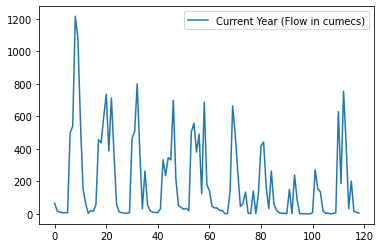

In [ ]:
from matplotlib import pyplot
df.plot()
pyplot.show()

In [ ]:

df.columns = ['ds', 'y']
df['ds']= pd.to_datetime(df['ds'])

In [ ]:
df

,ds,y
0,2007-01-01,65.837524
1,2007-02-01,16.640757
2,2007-03-01,10.690000
3,2007-04-01,7.601806
4,2007-05-01,7.429040
...,...,...
114,2018-11-01,31.844000
115,2018-12-01,201.542000
116,2019-01-01,15.496000
117,2019-02-01,10.222000


In [ ]:
from fbprophet import Prophet
# define the model

model = Prophet()
# fit the model
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds       yhat  yhat_lower  yhat_upper
0 2012-01-01  75.079201 -142.097095  287.015537
1 2012-02-01  49.278896 -176.418304  254.756020
2 2012-03-01  23.866719 -187.024463  236.806584
3 2012-04-01  11.729359 -203.483356  218.110467
4 2012-05-01  29.112089 -191.367039  252.438065


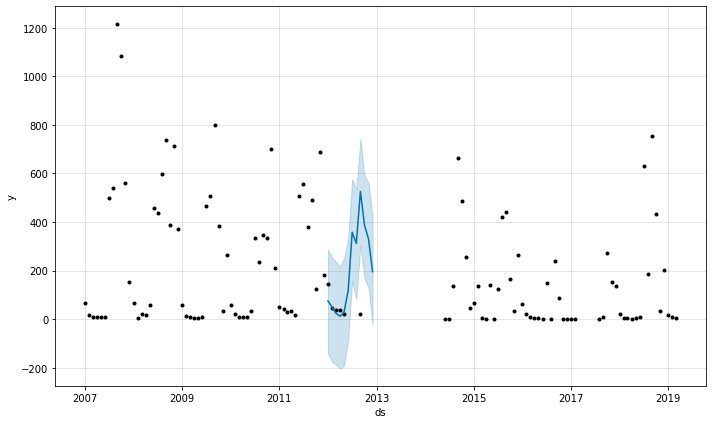

In [ ]:
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet
from matplotlib import pyplot

# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '2012-%02d' % i
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()

          ds       yhat  yhat_lower  yhat_upper
0 2013-01-01  51.716694 -163.483607  271.816396
1 2013-02-01  23.998952 -183.822292  239.423083
2 2013-03-01   5.413039 -221.523464  213.120072
3 2013-04-01  -8.048718 -237.185155  210.488111
4 2013-05-01   8.898733 -201.627647  219.697250


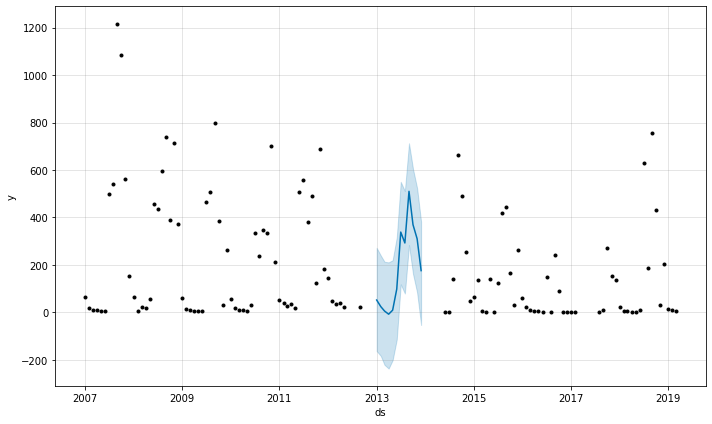

In [ ]:
# define the period for which we want a prediction
future = list()
for i in range(2013,2014):
  for j in range(1, 13):
    date = '%04d-%02d' % (i,j)
    future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()

In [ ]:
train = df.drop(df.index[-12:])
print(train.tail())

forecast = model.predict(train)


y_true = train['y'][:].values
y_pred = forecast['yhat'].values
rmse = mean_squared_error(y_true, y_pred, squared=False)
print('RMSE: %.3f' % rmse)
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

            ds        y
102 2017-11-01  154.639
103 2017-12-01  136.581
104 2018-01-01   20.349
105 2018-02-01    3.948
106 2018-03-01    5.429
RMSE: 172.325
MAE: 126.454


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  


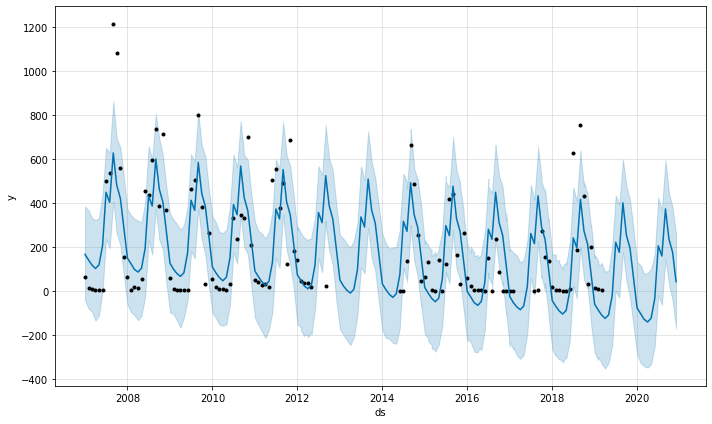

In [ ]:
future = list()
for i in df['ds'][:]:
  future.append(i)
for i in range(2012,2021):
  for j in range(1, 13):
    date = '%04d-%02d' % (i,j)
    future.append(date)
future = DataFrame(future)
future.columns = ['ds']
future['ds'] = to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
# plot forecast
model.plot(forecast)
pyplot.show()

RMSE: 172.977
MAE: 127.818


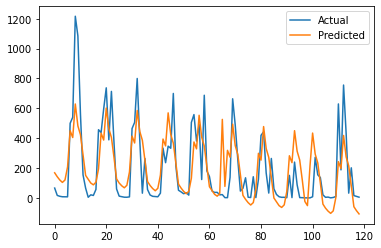

In [ ]:
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot




y_true = df['y'][:].values
y_pred = forecast['yhat'].values
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_true, y_pred, squared=False)
print('RMSE: %.3f' % rmse)
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()